# Project1
## Momentum Trading
### MACD

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import hvplot.pandas


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Investments Data Using Alpaca: `AAPLE` (stocks) 

In [3]:
# Set current amount of shares
my_apple = 1

In [4]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [5]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-10-23', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AAPL"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = "15Min"

# Get current closing prices for AAPL and SP500
df_tickers=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-23 08:00:00+00:00,172.05,172.60,171.68,736,172.60,32198,171.919792,AAPL
2023-10-23 08:15:00+00:00,171.75,172.01,171.75,310,172.01,22771,171.945607,AAPL
2023-10-23 08:30:00+00:00,171.86,171.86,171.70,141,171.76,9720,171.782001,AAPL
2023-10-23 08:45:00+00:00,171.70,171.82,171.70,62,171.82,3271,171.722443,AAPL
2023-10-23 09:00:00+00:00,170.46,171.67,170.00,1065,171.67,50372,170.773750,AAPL


In [6]:
# Reorganize the DataFrame
# Separate ticker data
df_tickers.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_tickers.head()

,close
timestamp,
2023-10-23 08:00:00+00:00,172.05
2023-10-23 08:15:00+00:00,171.75
2023-10-23 08:30:00+00:00,171.86
2023-10-23 08:45:00+00:00,171.70
2023-10-23 09:00:00+00:00,170.46


### MACD formula

In [7]:
# Set MACD formula and iterate over Apple data for the specified intervals and period of time

moving_average_convergance_divergence_ema12 = df_tickers['close'].ewm(halflife=12).mean()
moving_average_convergance_divergence_ema26 = df_tickers['close'].ewm(halflife=26).mean()
  

In [8]:

MACD_line = moving_average_convergance_divergence_ema12 - moving_average_convergance_divergence_ema26
MACD_line.head()


timestamp
2023-10-23 08:00:00+00:00    0.000000
2023-10-23 08:15:00+00:00   -0.002332
2023-10-23 08:30:00+00:00   -0.001908
2023-10-23 08:45:00+00:00   -0.003604
2023-10-23 09:00:00+00:00   -0.020617
Name: close, dtype: float64

In [9]:
Signal_line = MACD_line.ewm(halflife=9).mean()
Signal_line.head()

timestamp
2023-10-23 08:00:00+00:00    0.000000
2023-10-23 08:15:00+00:00   -0.001211
2023-10-23 08:30:00+00:00   -0.001461
2023-10-23 08:45:00+00:00   -0.002060
2023-10-23 09:00:00+00:00   -0.006364
Name: close, dtype: float64

In [10]:
df_tickers=df_tickers.assign(ewm12=df_tickers['close'].ewm(halflife=12).mean())
df_tickers.head()

,close,ewm12
timestamp,,
2023-10-23 08:00:00+00:00,172.05,172.050000
2023-10-23 08:15:00+00:00,171.75,171.895669
2023-10-23 08:30:00+00:00,171.86,171.883086
2023-10-23 08:45:00+00:00,171.70,171.833276
2023-10-23 09:00:00+00:00,170.46,171.526012


In [11]:
df_tickers=df_tickers.assign(ewm26=df_tickers['close'].ewm(halflife=26).mean())
df_tickers.head()

,close,ewm12,ewm26
timestamp,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629


In [12]:
df_tickers=df_tickers.assign(macd=MACD_line)
df_tickers.head()

,close,ewm12,ewm26,macd
timestamp,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617


In [13]:
df_tickers=df_tickers.assign(signal=Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal
timestamp,,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000,0.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332,-0.001211
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908,-0.001461
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604,-0.002060
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617,-0.006364


In [14]:
df_tickers=df_tickers.assign(histogram=MACD_line-Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram
timestamp,,,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000,0.000000,0.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332,-0.001211,-0.001121
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908,-0.001461,-0.000447
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604,-0.002060,-0.001544
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617,-0.006364,-0.014253


In [15]:
Close_plot = df_tickers['close'].hvplot.line(    
    x='timestamp', 
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Close_plot

:Curve   [timestamp]   (close)

In [16]:
MACD_plot = df_tickers['macd'].hvplot.line(    
    x='timestamp', 
    y='macd',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [17]:
Signal_plot = df_tickers['signal'].hvplot.line(    
    x='timestamp', 
    y='signal',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [18]:
plot = MACD_plot * Signal_plot 
display(Close_plot)
plot

:Curve   [timestamp]   (close)

:Overlay
   .Curve.Macd   :Curve   [timestamp]   (macd)
   .Curve.Signal :Curve   [timestamp]   (signal)

In [19]:
Histogram_plot = df_tickers['histogram'].hvplot.bar(    
    x='timestamp', 
    y='histogram',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='MACD-Signal', 
    xlabel='timestamp',
    title='MACD Line - Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Histogram_plot

:Bars   [timestamp]   (histogram)

In [20]:
# itterating over MACD line and Signal Line values of the same date in the final Data Frame above
df_tickers['return']=df_tickers['close'].pct_change()
display(df_tickers)




,close,ewm12,ewm26,macd,signal,histogram,return
timestamp,,,,,,,
2023-10-23 08:00:00+00:00,172.0500,172.050000,172.050000,0.000000,0.000000,0.000000,NaN
2023-10-23 08:15:00+00:00,171.7500,171.895669,171.898001,-0.002332,-0.001211,-0.001121,-0.001744
2023-10-23 08:30:00+00:00,171.8600,171.883086,171.884995,-0.001908,-0.001461,-0.000447,0.000640
2023-10-23 08:45:00+00:00,171.7000,171.833276,171.836880,-0.003604,-0.002060,-0.001544,-0.000931
2023-10-23 09:00:00+00:00,170.4600,171.526012,171.546629,-0.020617,-0.006364,-0.014253,-0.007222
...,...,...,...,...,...,...,...
2023-10-30 22:45:00+00:00,169.8699,169.827982,169.377869,0.450113,0.484036,-0.033923,-0.000177
2023-10-30 23:00:00+00:00,169.8200,169.827534,169.389501,0.438033,0.480626,-0.042593,-0.000294
2023-10-30 23:15:00+00:00,169.8500,169.828795,169.401616,0.427179,0.476664,-0.049485,0.000177


In [21]:
fund=10000
shares=fund/df_tickers.iloc[0,0]
print(f"Your Apple Shares are {shares}")

Your Apple Shares are 58.122638767800055


In [22]:
df_tickers["invest"]=df_tickers["close"] * shares
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram,return,invest
timestamp,,,,,,,,
2023-10-23 08:00:00+00:00,172.05,172.050000,172.050000,0.000000,0.000000,0.000000,NaN,10000.000000
2023-10-23 08:15:00+00:00,171.75,171.895669,171.898001,-0.002332,-0.001211,-0.001121,-0.001744,9982.563208
2023-10-23 08:30:00+00:00,171.86,171.883086,171.884995,-0.001908,-0.001461,-0.000447,0.000640,9988.956699
2023-10-23 08:45:00+00:00,171.70,171.833276,171.836880,-0.003604,-0.002060,-0.001544,-0.000931,9979.657076
2023-10-23 09:00:00+00:00,170.46,171.526012,171.546629,-0.020617,-0.006364,-0.014253,-0.007222,9907.585004


In [23]:
##Create a new column to indicate the trading signal based on the MACD line and the signal line:

df_tickers['Signal_Crossover'] = np.where(df_tickers['macd'] > df_tickers['signal'], 1, -1)


##Initialize variables to track the trading positions and the returns:

position = 0 # 1 for long, -1 for short, 0 for no position
returns = []


##Implement the trading strategy by iterating over the rows and making trading decisions based on the signal crossover:

for i in range(1, len(df_tickers)):
    if df_tickers['Signal_Crossover'][i] > df_tickers['Signal_Crossover'][i-1]:
        if position != 1:
            position = 1 # Go long
            returns.append(df_tickers['invest'][i] - df_tickers['invest'][i-1])
        else:
            returns.append(0)
    elif df_tickers['Signal_Crossover'][i] < df_tickers['Signal_Crossover'][i-1]:
        if position != -1:
            position = -1 # Go short
            returns.append(df_tickers['invest'][i-1] - df_tickers['invest'][i])
        else:
            returns.append(0)
    else:
        returns.append(0)


##Calculate the cumulative returns and plot them:

cumulative_returns = np.cumsum(returns)
print(cumulative_returns)



[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  23.24905551  23.24905551
  23.24905551  23.24905551  23.24905551  17.43679163  17.43679163
  17.43679163  17.43679163  17.43679163  17.43679163  17.43679163
  17.43679163  29.64254577  29.64254577  29.64254577  29.64254577
  29.64254577  29.64254577  29.64254577  29.64254577  29.64254577
  29.64254577  29.64254577

In [24]:
display(df_tickers)

,close,ewm12,ewm26,macd,signal,histogram,return,invest,Signal_Crossover
timestamp,,,,,,,,,
2023-10-23 08:00:00+00:00,172.0500,172.050000,172.050000,0.000000,0.000000,0.000000,NaN,10000.000000,-1
2023-10-23 08:15:00+00:00,171.7500,171.895669,171.898001,-0.002332,-0.001211,-0.001121,-0.001744,9982.563208,-1
2023-10-23 08:30:00+00:00,171.8600,171.883086,171.884995,-0.001908,-0.001461,-0.000447,0.000640,9988.956699,-1
2023-10-23 08:45:00+00:00,171.7000,171.833276,171.836880,-0.003604,-0.002060,-0.001544,-0.000931,9979.657076,-1
2023-10-23 09:00:00+00:00,170.4600,171.526012,171.546629,-0.020617,-0.006364,-0.014253,-0.007222,9907.585004,-1
...,...,...,...,...,...,...,...,...,...
2023-10-30 22:45:00+00:00,169.8699,169.827982,169.377869,0.450113,0.484036,-0.033923,-0.000177,9873.286835,-1
2023-10-30 23:00:00+00:00,169.8200,169.827534,169.389501,0.438033,0.480626,-0.042593,-0.000294,9870.386516,-1
2023-10-30 23:15:00+00:00,169.8500,169.828795,169.401616,0.427179,0.476664,-0.049485,0.000177,9872.130195,-1


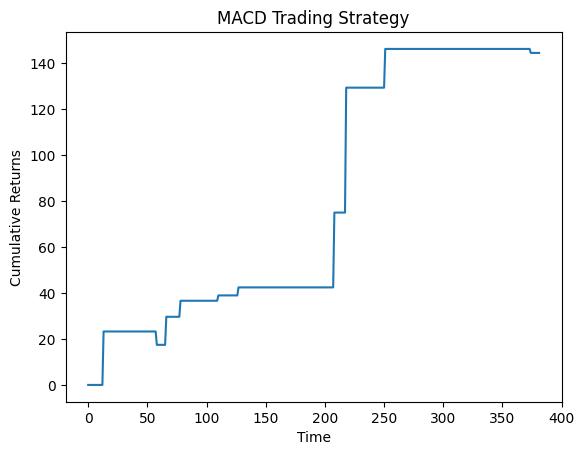

In [25]:
plt.plot(cumulative_returns)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('MACD Trading Strategy')
plt.show()


In [26]:
# Format current date as ISO format
start_time=pd.Timestamp('2023-10-30', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["SPY"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = "1Min"

# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_spy.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-10-30 08:00:00+00:00,413.18,413.18,412.42,55,412.42,3271,413.039979,SPY
2023-10-30 08:01:00+00:00,413.19,413.19,413.13,21,413.13,1064,413.148148,SPY
2023-10-30 08:02:00+00:00,413.14,413.28,413.14,11,413.28,1072,413.238694,SPY
2023-10-30 08:03:00+00:00,413.09,413.17,413.03,22,413.06,2111,413.134737,SPY
2023-10-30 08:04:00+00:00,413.09,413.10,413.09,24,413.09,1432,413.095272,SPY


In [27]:
# Reorganize the DataFrame
# Separate ticker data
df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_spy.head()

,close
timestamp,
2023-10-30 08:00:00+00:00,413.18
2023-10-30 08:01:00+00:00,413.19
2023-10-30 08:02:00+00:00,413.14
2023-10-30 08:03:00+00:00,413.09
2023-10-30 08:04:00+00:00,413.09


In [28]:
# Returns 
df_spy['return']=df_spy['close'].pct_change()
df_spy.head()


,close,return
timestamp,,
2023-10-30 08:00:00+00:00,413.18,NaN
2023-10-30 08:01:00+00:00,413.19,0.000024
2023-10-30 08:02:00+00:00,413.14,-0.000121
2023-10-30 08:03:00+00:00,413.09,-0.000121
2023-10-30 08:04:00+00:00,413.09,0.000000


In [29]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
display(df_spy.head)

<bound method NDFrame.head of                             close    return   cumprod
timestamp                                            
2023-10-30 08:00:00+00:00  413.18       NaN       NaN
2023-10-30 08:01:00+00:00  413.19  0.000024  1.000024
2023-10-30 08:02:00+00:00  413.14 -0.000121  0.999903
2023-10-30 08:03:00+00:00  413.09 -0.000121  0.999782
2023-10-30 08:04:00+00:00  413.09  0.000000  0.999782
...                           ...       ...       ...
2023-10-30 23:55:00+00:00  415.30 -0.000144  1.005131
2023-10-30 23:56:00+00:00  415.28 -0.000048  1.005083
2023-10-30 23:57:00+00:00  415.25 -0.000072  1.005010
2023-10-30 23:58:00+00:00  415.13 -0.000289  1.004719
2023-10-30 23:59:00+00:00  415.18  0.000120  1.004841

[823 rows x 3 columns]>

In [30]:

df_spy['invest']=df_spy['cumprod']*fund
display(df_spy)

,close,return,cumprod,invest
timestamp,,,,
2023-10-30 08:00:00+00:00,413.18,NaN,NaN,NaN
2023-10-30 08:01:00+00:00,413.19,0.000024,1.000024,10000.242025
2023-10-30 08:02:00+00:00,413.14,-0.000121,0.999903,9999.031899
2023-10-30 08:03:00+00:00,413.09,-0.000121,0.999782,9997.821773
2023-10-30 08:04:00+00:00,413.09,0.000000,0.999782,9997.821773
...,...,...,...,...
2023-10-30 23:55:00+00:00,415.30,-0.000144,1.005131,10051.309357
2023-10-30 23:56:00+00:00,415.28,-0.000048,1.005083,10050.825306
2023-10-30 23:57:00+00:00,415.25,-0.000072,1.005010,10050.099230


In [31]:
spy_plot = df_spy['invest'].hvplot.line(    
    x='timestamp', 
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns', 
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

:Curve   [timestamp]   (invest)

In [32]:
spy_return=df_spy.iloc[-1,-1] - df_spy.iloc[1,-1]
print(f"You made a profit of your SPY investement of $ {spy_return}")

You made a profit of your SPY investement of $ 48.16302822016769


In [33]:
final_df=pd.DataFrame({"MACD": [cumulative_returns[-1]], "SPY":[spy_return]})
final_df.head()

,MACD,SPY
0,144.434757,48.163028


<AxesSubplot:title={'center':'MACD vs SPY Investement'}>

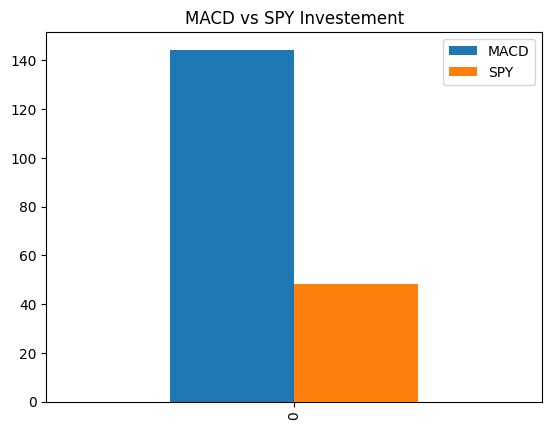

In [34]:

final_df.plot(kind ='bar', title='MACD vs SPY Investement')